<a href="https://colab.research.google.com/github/FarshadAmiri/Learning-codes/blob/master/None_Linear_regression_GDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [116]:
!wget -nv -O china_gdp.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv
df = pd.read_csv("china_gdp.csv")

2021-03-14 21:28:10 URL:https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


In [117]:
df.describe()

,Year,Value
count,55.00000,5.500000e+01
mean,1987.00000,1.437042e+12
std,16.02082,2.500085e+12
min,1960.00000,4.668518e+10
25%,1973.50000,1.395123e+11
50%,1987.00000,3.074796e+11
75%,2000.50000,1.268748e+12
max,2014.00000,1.035483e+13


In [118]:
df['Year'] = df['Year'] - df['Year'].min()
df['Year'] = df['Year']/df['Year'].max()
df['Value'] = df['Value']/df['Value'].max()

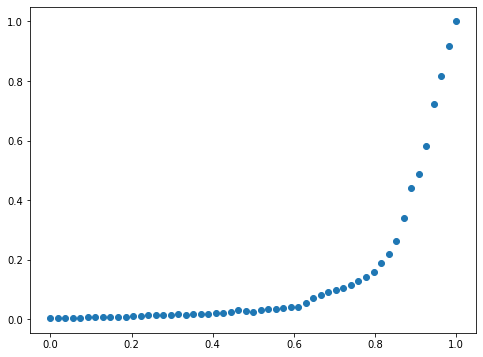

In [119]:
plt.figure(figsize=(8,6))
plt.scatter(df['Year'], df['Value'])

In [120]:
def sigmoidical_curve(x, a, b):
  return (1 / (1+np.exp(a*(x-b))))

In [121]:
popt , pcov = curve_fit(sigmoidical_curve, df['Year'], df['Value'],)

In [124]:
xx = np.linspace(0,1,500)
yy = []
for i in xx:
  yy.append(sigmoidical_curve(i, popt[0], popt[1]))

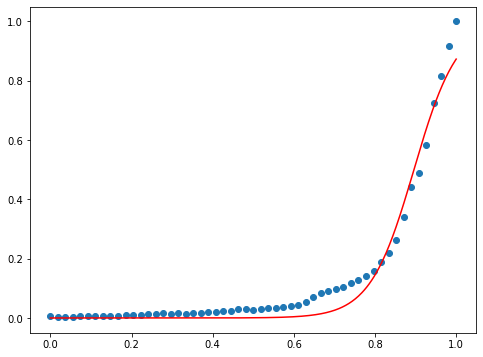

In [125]:
plt.figure(figsize=(8,6))
plt.scatter(df['Year'], df['Value'])
plt.plot(xx,yy,'r')